# 1) Inialization

## 1.1) Import utilities

In [1]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
import tensorflow as tf
import tensorflow.math as tfm
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag

TRAINDIR = '/local/Tom.Beucler/SPCAM_PHYS/'
DATADIR = '/project/meteo/w2w/A6/S.Rasp/SP-CAM/fluxbypass_aqua/'
PREFIX = '8col009_01_'
%cd /filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM

# Otherwise tensorflow will use ALL your GPU RAM for no reason
limit_mem()

/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/t/Tom.Beucler/miniconda3/lib/python3.7/site-packages

/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog
/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM


## 1.2) Define models

In [11]:
# Config and data files
# config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
# data_fn_a = ['/local/Tom.Beucler/SPCAM_PHYS/8col009_01_valid.nc',
#              '/local/Tom.Beucler/SPCAM_PHYS/8col009_14_valid.nc',
#              '/local/Tom.Beucler/SPCAM_PHYS/8col009_31_valid.nc']
# data_ref = ['','4K','3Kw1']
# dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer,\
#            'weak_loss_0':mse,'weak_loss_1':mse}
# NNarray = ['JNNL','JNNC','MLRL0','JNNL0.01']

# Config and data files for POG experiment
config_fn = ['/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/101_PostProc.yml',
            '/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/104_PostProc.yml',
            '/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/107_PostProc.yml',
            '/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/110_PostProc.yml']
data0K_fn = ['/local/Tom.Beucler/SPCAM_PHYS/101_valid.nc',
            '/local/Tom.Beucler/SPCAM_PHYS/104_valid.nc',
            '/local/Tom.Beucler/SPCAM_PHYS/107_valid.nc',
            '/local/Tom.Beucler/SPCAM_PHYS/110_valid.nc']
data4K_fn = ['/local/Tom.Beucler/SPCAM_PHYS/102_valid.nc',
            '/local/Tom.Beucler/SPCAM_PHYS/105_valid.nc',
            '/local/Tom.Beucler/SPCAM_PHYS/108_valid.nc',
            '/local/Tom.Beucler/SPCAM_PHYS/111_valid.nc']
NNarray = ['POG101','POG104','POG107','POG110','POG113']
NNname = ['q T','RH T','q Tma','RH Tma','q Carnotmax']

# 2) Test where the generalization error for convective heating and moistening is most obvious for different types of networks

In [12]:
# Indices of different variables
PHQ_idx = slice(0, 30)
PHCLDLIQ_idx = slice(30, 60)
PHCLDICE_idx = slice(60, 90)
#TPHYSTND_idx = slice(90, 120)
TPHYSTND_idx = slice(30,60)

In [13]:
#lat_ind = [31,32] # index over which we evaluate generalization performances
lat_ind = np.arange(20,25) # Based on notebook 027
iini = 1000
iend = 1015
#index = 1; # Choose dataset from data_fn_a [0 is +0K of length 5172, 1 is +4K of length ???]

NN = {}; md0 = {}; md4 = {};
%cd $TRAINDIR/HDF5_DATA
for i,NNs in enumerate(NNarray):
    print('NN name is ',NNs)
    path = TRAINDIR+'HDF5_DATA/'+NNs+'.hdf5'
    #NN[NNs] = load_model(path,custom_objects=dict_lay)
    NN[NNs] = load_model(path)
    md0[NNs] = ModelDiagnostics(NN[NNs],config_fn[i],data0K_fn[i])
    md4[NNs] = ModelDiagnostics(NN[NNs],config_fn[i],data4K_fn[i])

/scratch-local/Tom.Beucler/SPCAM_PHYS/HDF5_DATA
NN name is  POG101


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


NN name is  POG104


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)
/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


NN name is  POG107


/home/t/Tom.Beucler/SPCAM/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


FileNotFoundError: [Errno 2] No such file or directory: b'/local/Tom.Beucler/SPCAM_PHYS/107_valid.nc'

In [ ]:
for i in range(2):
    if i==0: md = md0
    elif i==1: md = md4
diagno = {} # Diagnostics structure
diagno['truth'] = {} # Diagnostics structure for the truth
for i,NNs in enumerate(NNarray):
    diagno[NNs] = {} # Diagnostics structure for each NN
    for itime in tqdm(np.arange(iini,iend)):
        # Get input, prediction and truth from NN
        inp, p, truth = md[NNs].get_inp_pred_truth(itime)  # [lat, lon, var, lev]
        # Get convective heating and moistening for each NN
        if itime==iini:
            if i==0:
                diagno['truth']['PHQ'] = md[NNs].reshape_ngeo(truth[:,PHQ_idx])[lat_ind,:,:,np.newaxis]
                diagno['truth']['TPHYSTND'] = md[NNs].reshape_ngeo(truth[:,TPHYSTND_idx])[lat_ind,:,:,np.newaxis]
            diagno[NNs]['PHQ'] = md[NNs].reshape_ngeo(p[:,PHQ_idx])[lat_ind,:,:,np.newaxis]
            diagno[NNs]['TPHYSTND'] = md[NNs].reshape_ngeo(p[:,TPHYSTND_idx])[lat_ind,:,:,np.newaxis]
        else:
            for istr,field in enumerate(['PHQ','TPHYSTND']):
                diagno[NNs][field] = np.concatenate((diagno[NNs][field],
                                                     md[NNs].reshape_ngeo(p[:,PHQ_idx])[lat_ind,:,:,np.newaxis]),
                                                    axis=3)
                if i==0:
                    diagno['truth'][field] = np.concatenate((diagno['truth'][field],
                                                             md[NNs].reshape_ngeo(truth[:,PHQ_idx])[lat_ind,:,:,np.newaxis]),
                                                            axis=3)
    if i==0: diagno0 = diagno
    elif i==1: diagno4 = diagno

## Idea = Systematic biases should be visible in the mean

In [5]:
# Load coordinates
coor = xr.open_dataset("/project/meteo/w2w/A6/S.Rasp/SP-CAM/fluxbypass_aqua/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.0000-01-01-00000.nc",\
                    decode_times=False)
lat = coor.lat; lon = coor.lon; lev = coor.lev;
coor.close();

In [6]:
# Plot characteristics
fz = 15
lw = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

NameError: name 'diagno' is not defined

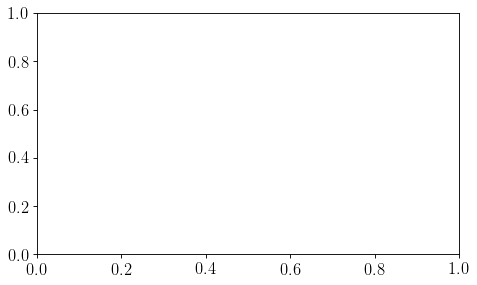

In [7]:
option = 'full' # Full profile vs profile bias
simu = '0K'

if simu=='0K': diagno = diagno0
elif simu=='+4K': diagno=diagno4
    
f = plt.figure(num=None, figsize=(15,4), dpi=80, facecolor='w', edgecolor='k')

for ifig,field in enumerate(['PHQ','TPHYSTND']):
    ax = f.add_subplot(1,2,ifig+1)
    if option=='full': plt.plot(np.mean(diagno['truth'][field],axis=(0,1,3)),lev,label='Truth',color='k')
    elif option=='bias': plt.plot(0*lev**0,lev,label='Truth',color='k')
    for i,NNs in enumerate(NNarray):
    #for i,NNs in enumerate(NNarray):
        if option=='full': plt.plot(np.mean(diagno[NNs][field],axis=(0,1,3)),lev,label=NNname[i])
        elif option=='bias': plt.plot(np.mean(diagno[NNs][field]-diagno['truth'][field],axis=(0,1,3)),lev,label=NNname[i])
    plt.legend()
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure [hPa]')
    plt.xlabel(field+' [W/m2]')
    if option=='full': plt.title('Mean '+simu+' lat='+'%02.1f'%coor.lat[lat_ind[0]]+','+'%02.1f'%coor.lat[lat_ind[-1]]+\
                                ' t='+str(iini)+','+str(iend))
    elif option=='bias': plt.title('Mean bias '+simu+' lat='+'%02.1f'%coor.lat[lat_ind[0]]+','+'%02.1f'%coor.lat[lat_ind[-1]]+\
                                  ' t='+str(iini)+','+str(iend))